In [93]:
import os
import numpy as np
import cv2
import zipfile
import requests
import glob as glob
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import warnings
import logging
import absl
warnings.filterwarnings("ignore", module="absl")
logging.captureWarnings(True)
absl_logger = logging.getLogger("absl")
absl_logger.setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [94]:
	
def download_file(url, save_name):
    url = url
    file = requests.get(url)
    open(save_name, 'wb').write(file.content)

In [95]:

def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [60]:

download_file( 
    'https://www.dropbox.com/s/5jhbvmqgzbzl9fd/camvid_images.zip?dl=1',
    'camvid_images.zip'
)
unzip(zip_file='camvid_images.zip')

Extracted all


In [96]:
	
image_paths = sorted(glob.glob('camvid_images' + '/*.png'))
for idx in range(len(image_paths)):
    print(image_paths[idx])

camvid_images/1.png
camvid_images/2.png


In [98]:
def load_image(path):
    image = cv2.imread(path)     
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
    image = np.expand_dims(image, axis=0)/255.0
    return image

IndexError: list index out of range

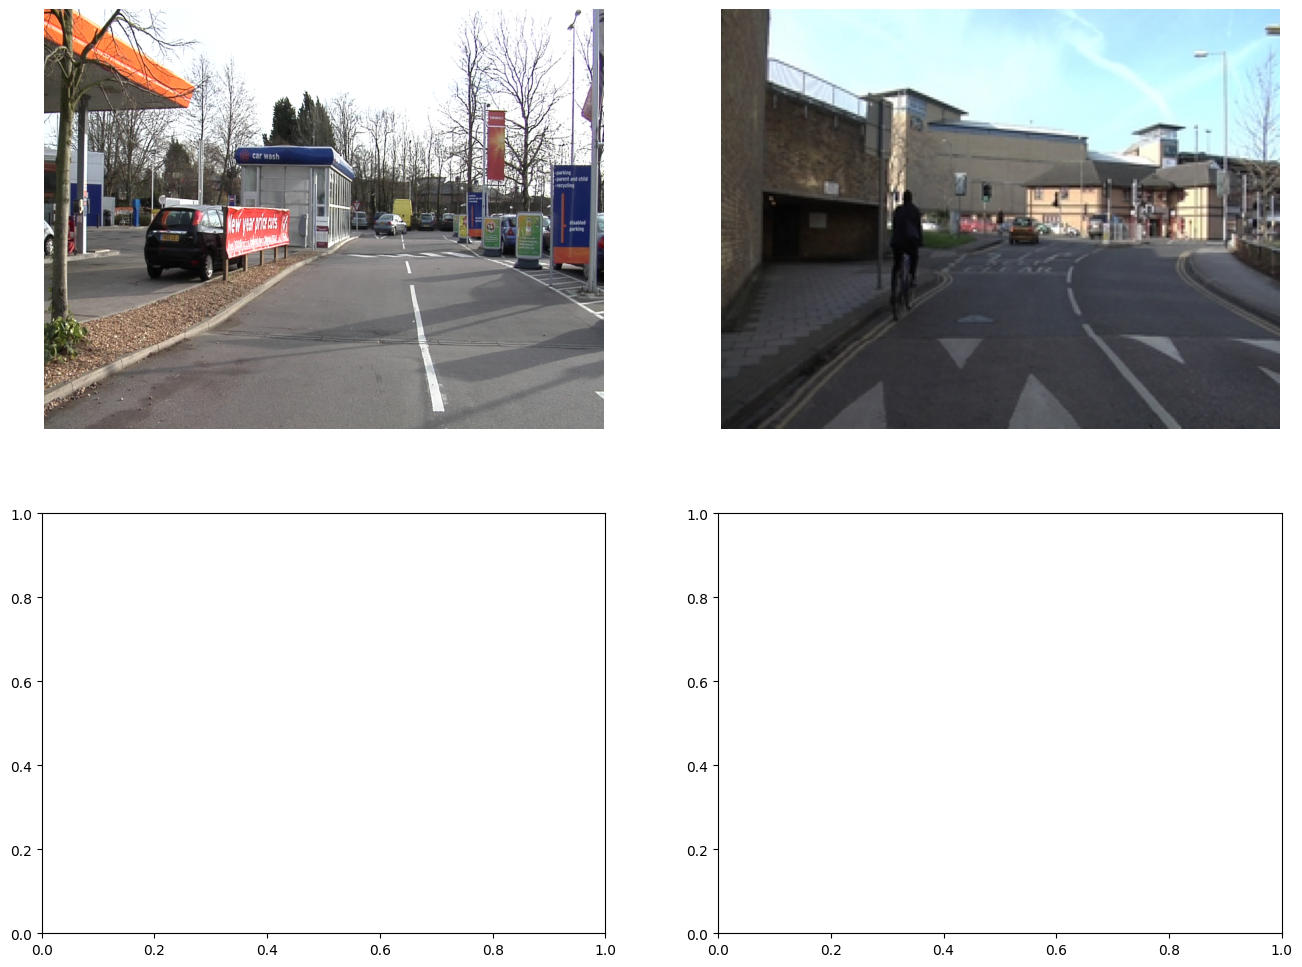

In [99]:
images = []
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
for idx, axis in enumerate(ax.flat):
    image = load_image(image_paths[idx])
    images.append(image)
    axis.imshow(image[0])
    axis.axis('off')

In [100]:
class_index = \
    {
         0: [(64, 128, 64),  'Animal'],
         1: [(192, 0, 128),  'Archway'],
         2: [(0, 128, 192),  'Bicyclist'],
         3: [(0, 128, 64),   'Bridge'],
         4: [(128, 0, 0),    'Building'],
         5: [(64, 0, 128),   'Car'],
         6: [(64, 0, 192),   'Cart/Luggage/Pram'],
         7: [(192, 128, 64), 'Child'],
         8: [(192, 192, 128),'Column Pole'],
         9: [(64, 64, 128),  'Fence'],
        10: [(128, 0, 192),  'LaneMkgs Driv'],
        11: [(192, 0, 64),   'LaneMkgs NonDriv'],
        12: [(128, 128, 64), 'Misc Text'],
        13: [(192, 0, 192),  'Motorcycle/Scooter'],
        14: [(128, 64, 64),  'Other Moving'],
        15: [(64, 192, 128), 'Parking Block'],
        16: [(64, 64, 0),    'Pedestrian'],
        17: [(128, 64, 128), 'Road'],
        18: [(128, 128, 192),'Road Shoulder'],
        19: [(0, 0, 192),    'Sidewalk'],
        20: [(192, 128, 128),'Sign Symbol'],
        21: [(128, 128, 128),'Sky'],
        22: [(64, 128, 192), 'SUV/Pickup/Truck'],
        23: [(0, 0, 64),     'Traffic Cone'],
        24: [(0, 64, 64),    'Traffic Light'],
        25: [(192, 64, 128), 'Train'],
        26: [(128, 128, 0),  'Tree'],
        27: [(192, 128, 192),'Truck/Bus'],
        28: [(64, 0, 64),    'Tunnel'],
        29: [(192, 192, 0),  'Vegetation Misc'],
        30: [(0, 0, 0),      'Void'],
        31: [(64, 192, 0),   'Wall']  
    }

In [24]:
model_url =  'https://tfhub.dev/google/HRNet/camvid-hrnetv2-w48/1'
print('loading model: ', model_url)
seg_model = hub.load(model_url)
print('\nmodel loaded!')

loading model:  https://tfhub.dev/google/HRNet/camvid-hrnetv2-w48/1

model loaded!


In [101]:

pred_mask = seg_model.predict(images[0]) 
print('Shape of predicted mask: ', pred_mask.shape)

Shape of predicted mask:  (1, 720, 960, 33)


In [102]:
pred_mask = pred_mask.numpy() 
pred_mask = pred_mask[:,:,:,1:] 
pred_mask = np.squeeze(pred_mask) 
print('Shape of predicted mask after removal of batch dimension and background class: ', pred_mask.shape)

Shape of predicted mask after removal of batch dimension and background class:  (720, 960, 32)


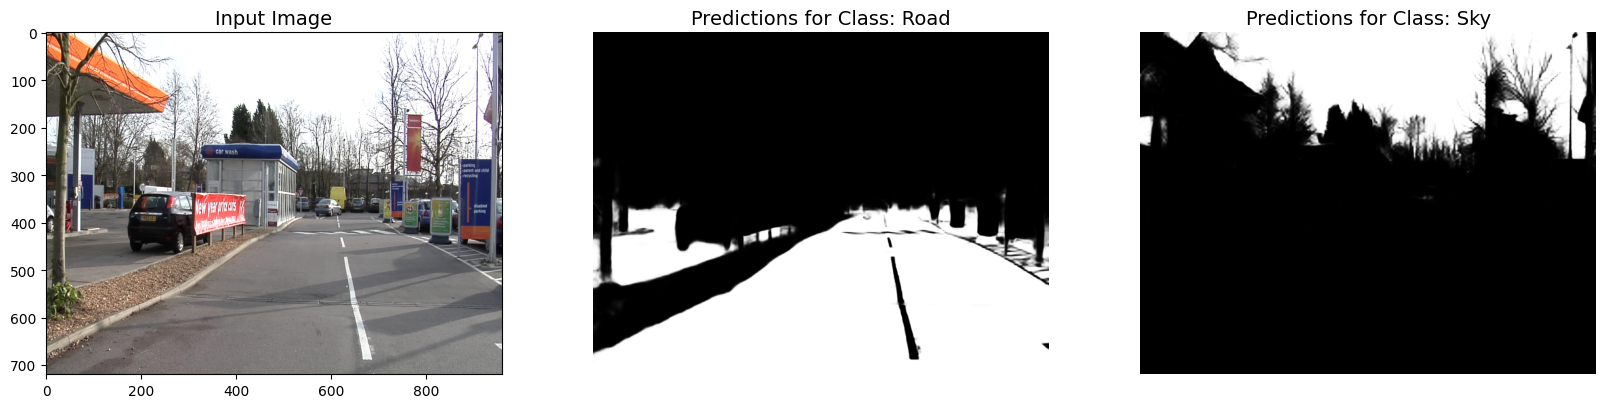

In [103]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Input Image', fontsize=14)
plt.imshow(np.squeeze(images[0]))
plt.subplot(1,3,2)
plt.title('Predictions for Class: Road', fontsize=14)
plt.imshow(pred_mask[:,:,17], cmap='gray');  # Class 17 corresponds to the 'road' class
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Predictions for Class: Sky', fontsize=14)
plt.imshow(pred_mask[:,:,21], cmap='gray');  # Class 21 corresponds to the 'sky' class
plt.axis('off');

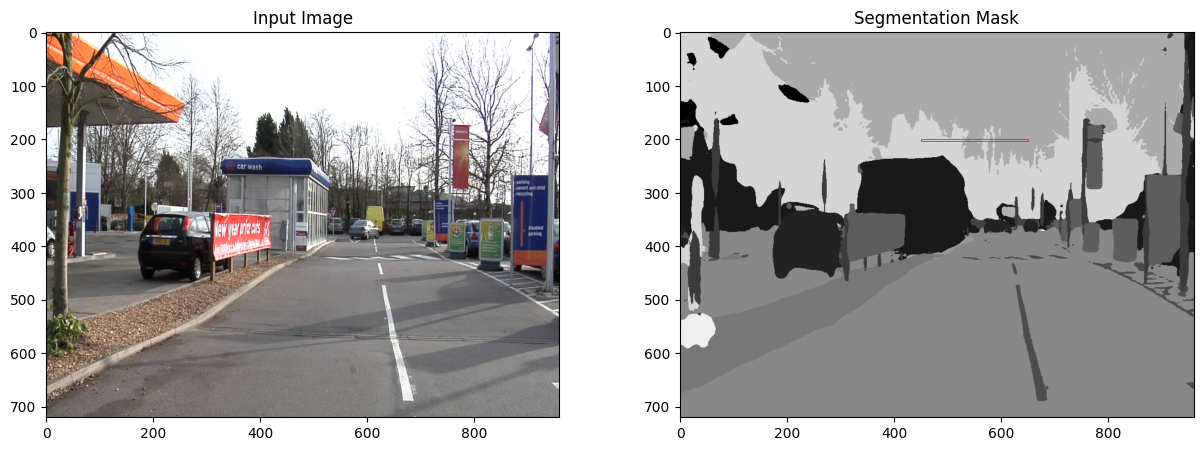

In [104]:
pred_mask_class = np.argmax(pred_mask, axis=-1) 
plt.figure(figsize=(15,5)); 
plt.subplot(1,2,1)
plt.title('Input Image', fontsize=12)
plt.imshow(np.squeeze(images[0]))
plt.subplot(1,2,2)
plt.title('Segmentation Mask', fontsize=12)
plt.imshow(pred_mask_class, cmap='gray') 
plt.gca().add_patch(Rectangle((450,200),200,3, edgecolor='red', facecolor='none', lw=.5));

In [105]:
print(pred_mask_class[200,450:650])

[26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 26 26 26
 26 26 26 26 26 26 26 26 26 21 21 21 21 21 21 26 26 26 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21]


In [106]:
def class_to_rgb(mask_class, class_index):     
    r_map = np.zeros_like(mask_class).astype(np.uint8)
    g_map = np.zeros_like(mask_class).astype(np.uint8)
    b_map = np.zeros_like(mask_class).astype(np.uint8)     
    for class_id in range(len(class_index)):
        index = mask_class == class_id
        r_map[index] = class_index[class_id][0][0]
        g_map[index] = class_index[class_id][0][1]
        b_map[index] = class_index[class_id][0][2]
    seg_map_rgb = np.stack([r_map, g_map, b_map], axis=2)
    return seg_map_rgb

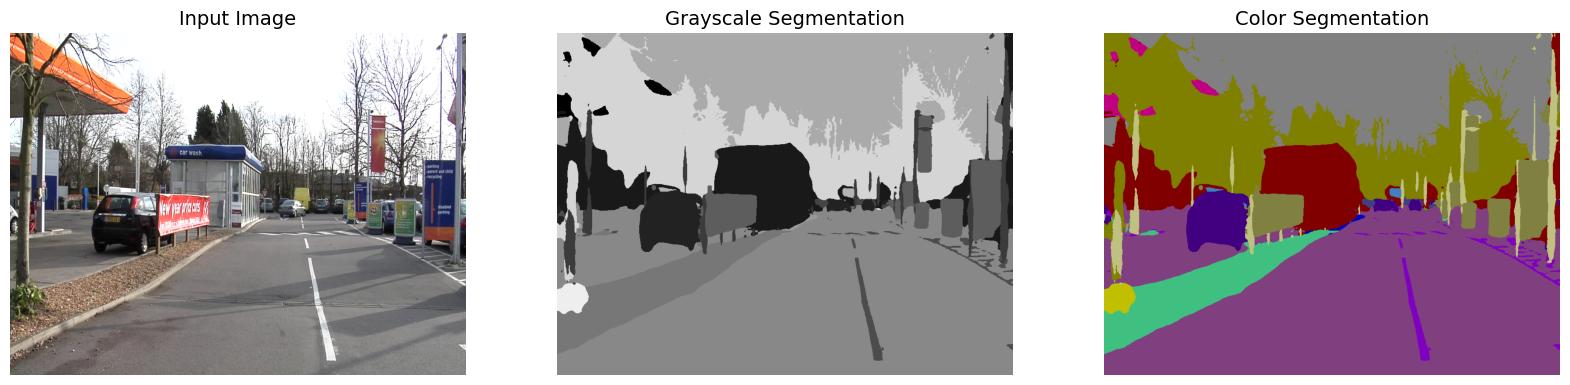

In [107]:
pred_mask_rgb = class_to_rgb(pred_mask_class, class_index)  
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('Input Image', fontsize=14)
plt.imshow(np.squeeze(images[0]))
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Grayscale Segmentation', fontsize=14)
plt.imshow(pred_mask_class, cmap='gray') 
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Color Segmentation', fontsize=14)
plt.imshow(pred_mask_rgb, cmap='gray')  
plt.axis('off');

In [108]:
def image_overlay(image, seg_map_rgb):
    alpha = 1.0 # Transparency for the original image.
    beta  = 0.6 # Transparency for the segmentation map.
    gamma = 0.0 # Scalar added to each sum.
    image = (image*255.0).astype(np.uint8)
    seg_map_rgb = cv2.cvtColor(seg_map_rgb, cv2.COLOR_RGB2BGR)
    image = cv2.addWeighted(image, alpha, seg_map_rgb, beta, gamma)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [109]:
def run_inference(images, model):
    for img in images:         
        pred_mask = model.predict(img).numpy()         
        pred_mask = pred_mask[:,:,:,1:]         
        pred_mask = np.squeeze(pred_mask)
        pred_mask_class = np.argmax(pred_mask, axis=-1) 
        pred_mask_rgb = class_to_rgb(pred_mask_class, class_index)
        fig = plt.figure(figsize=(20, 15))
        ax1 = fig.add_subplot(1,3,1)
        ax1.imshow(img[0])
        ax1.title.set_text('Input Image')
        plt.axis('off') 
        ax2 = fig.add_subplot(1,3,2)
        ax2.set_title('Predicted Mask')
        ax2.imshow(pred_mask_rgb)
        plt.axis('off') 
        overlayed_image = image_overlay(img[0], pred_mask_rgb)
        ax4 = fig.add_subplot(1,3,3)
        ax4.set_title('Overlayed Image')
        ax4.imshow(overlayed_image)
        plt.axis('off')
        plt.show()

In [110]:
def plot_color_legend(class_index):     
    color_array = np.array([[v[0][0], v[0][1], v[0][2]] for v in class_index.values()]).astype(np.uint8)
    class_labels = [val[1] for val in class_index.values()]    
    fig, ax = plt.subplots(nrows=2, ncols=16, figsize=(20, 3))
    plt.subplots_adjust(wspace = 0.5, hspace=0.01)     
    for i, axis in enumerate(ax.flat):
        axis.imshow(color_array[i][None, None, :])
        axis.set_title(class_labels[i], fontsize = 8)
        axis.axis('off')

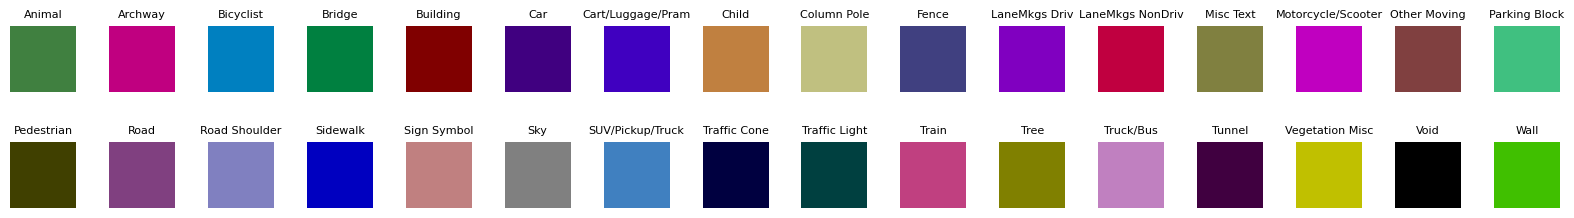

In [111]:
plot_color_legend(class_index)

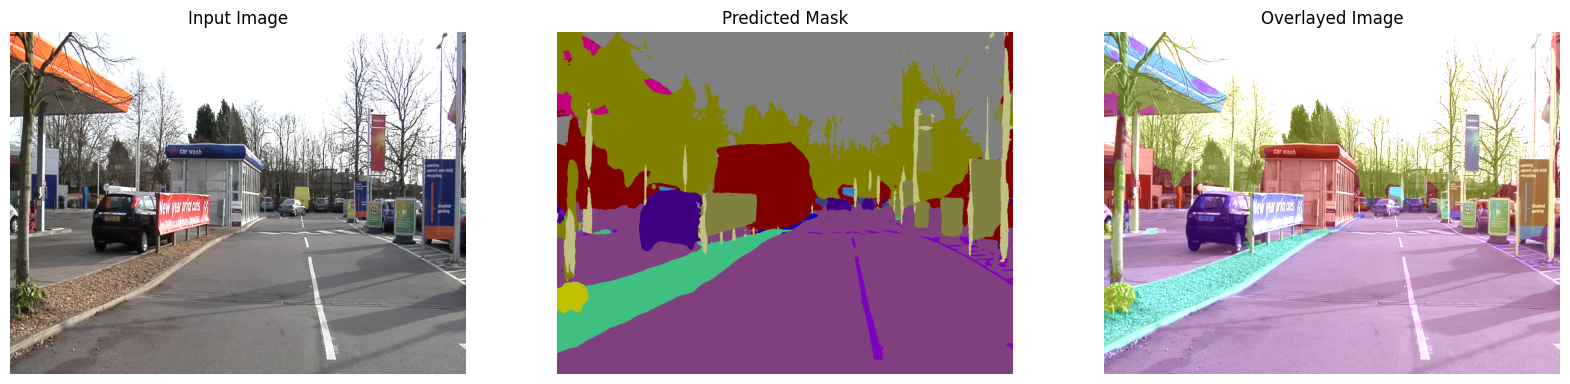

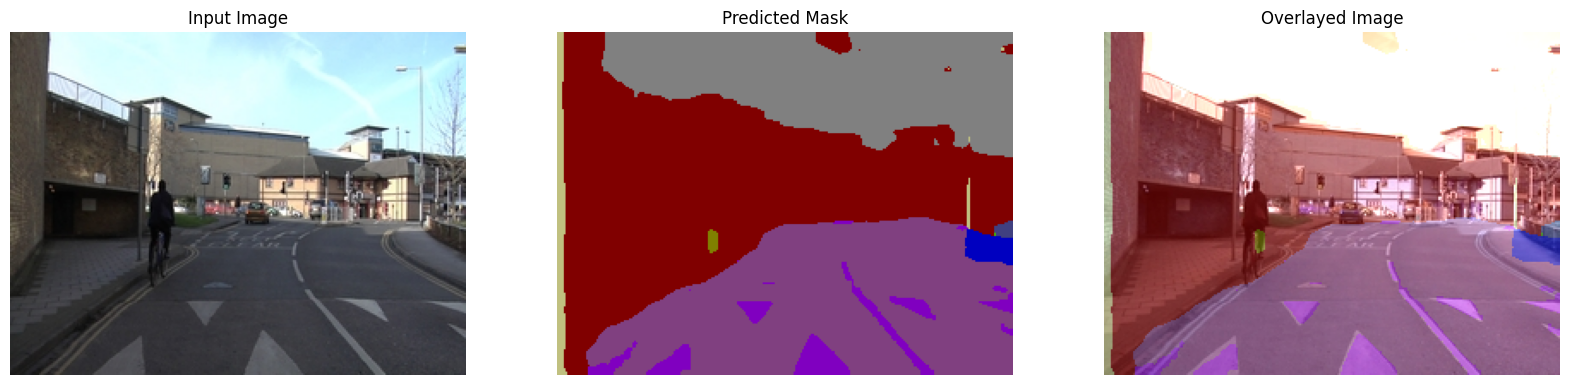

In [112]:
run_inference(images, seg_model)